<a href="https://colab.research.google.com/github/ryeos/DataMining-CaseStudy-Classification/blob/main/DataMining_CaseStudy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK 4**

Jovina Nareswari H (2106708223)

Rafly Witjaksana H (2106651572)

Ricky (2106724952)

Rifqah Majidah A. Nst (2106725122)

Titania Puteri S (2106654246)


#Studi Kasus Data Mining: Aplikasi Model klasifikasi
###Domain Knowledge & Data Understanding:
- Data dibawah ini adalah data Hoax dari https://www.mafindo.or.id/ yang didapatkan secara legal dengan meminta izin kepada pimpinan perusahaan Mafindo.
- Label "0" menyatakan bukan Hoax dan "1" menyatakan post Hoax.

###Tugas Anda:
- Lakukan PreProcessing pada variabel "teks" di data.
- Lalukan EDA pada data Hoax tersebut.
- Buat Model klasifikasi Hoax terbaik dengan parameter optimal (dan cross validated)
- Buatlah sebuah laporan Analisa Data tersebut (di Jupyter Notebook) seolah-olah anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data Hoax yang ada.
- Jangan lupa jika anda akan melakukan attach gambar (misal screenshot dari Voyant Tools) maka jangan load local file, tapi upload terlebih dahulu ke GitHub (kalian sendiri) lalu load di Jupyter Notebook.
- Cara load image dengan markdown saat gambar ada di GitHub: https://stackoverflow.com/a/63270255/2844866
- Ingat jangan load local image(s) karena dosen tidak akan bisa membukanya.
- Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, Performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.
- Code harus bisa di "Run-All" di Google Colab, "Error Free", dan TIDAK PERLU REQUEST ACCESS (bisa dibuka oleh umum/public).

In [ ]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
    data = pd.read_csv(fData)

data.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [ ]:
!pip install Sastrawi
!pip install unidecode
!pip install wordcloud
!pip install indoNLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 828.1 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from indoNLP.preprocessing import replace_slang
from wordcloud import WordCloud
from textblob import TextBlob

##Preprocessing

In [ ]:
# Random seed for consistency
np.random.seed(42)

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Label Encoder use to Encode target labels with value between 0 and n_classes-1
Encoder = LabelEncoder()

# TfidfVectorizer Convert a collection of raw documents to a matrix of TF-IDF features.
Tfidf_vect = TfidfVectorizer()

In [ ]:
# Pilih dataset dengan label 1 dan lakukan randomisasi untuk setiap baris datanya
hoax = data[data['label'] == 1]

# Concat dataset berlabel 1 yang telah dipilih dengan dataset berlabel 0
# dimana jumlah dataset berlabel 1 yang digabungkan sejumlah banyak dataset berlabel 0 + 200
true_fact = data[data['label'] == 0]
df = true_fact.append(hoax[:len(true_fact) + 200])

df

,ID,label,tanggal,judul,narasi,nama file gambar
19,6775,0,25-Oct-17,Sandi Sarankan Warga Ngadu ke Kelurahan Saja,Astaga! Sandiaga Sarankan Warga Ngadu ke Kelur...,6775.jpg
21,7038,0,13-Jul-17,"Irina, Istri Ahli IT Hermansyah disebut Mantan...","Irina, Istri Ahli IT Hermansyah disebut Mantan...",7038.jpg
22,7214,0,8-Mar-17,"Nezar Patria adalah Kader PKI, Ikut Rapat Seti...","Nezar Patria adalah Kader PKI, Ikut Rapat Seti...",7214.jpg
55,13483,0,17-Jul-18,Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...,Kendati sukses mengantarkan Timnas Indonesia U...,13483.png
58,13907,0,28-Apr-18,Kronologis Polisi Berondong Sedan Terobos Razi...,"Innalillah… Hanya Karena Lalai Terobos Razia, ...",13907.png
...,...,...,...,...,...,...
1268,296372,1,5-Apr-20,Foto Dampak 16 Hari Lockdown di Italia,"Sejak Senin (16/3/2020), Perdana menteri Itali...",296372.png
1269,296552,1,20-Mar-20,Pasar Kodya Cirebon Ditutup Mulai 20 Maret 2020,"Mulai besok, jum’at 20 maret 2020 semua pasar ...",296552.jpg
1270,296909,1,29-Jan-20,"Diduga Terinfeksi Virus Corona, Seorang Warga ...","Barusan dishare dari group faskes rs sedepok, ...",296909.jpg
1271,297216,1,10-Dec-19,Sapi Yang Tersambar Petir Di Kupang Dagingnya ...,Jangan beli daging sapi dulu untuk sebulan Kar...,297216.jpg


In [ ]:
feature = df['narasi']
label = df['label']

In [ ]:
# Mengubah semua huruf pada setiap baris menjadi huruf kecil dan
# melakukan stemming pada setiap baris
lower = [stemmer.stem(row.lower()) for row in feature]

In [ ]:
# Melakukan tokenisasi untuk setiap baris dataset
tokens = [word_tokenize(element) for element in lower]

In [ ]:
len(lower)

1902

In [ ]:
for i in range (len(lower)):
  lower[i]=replace_slang(lower[i])

In [ ]:
#Removing Stop Word
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopword = factory.create_stop_word_remover()

for i in range (len(lower)):
  lower[i]=stopword.remove(lower[i])

##EDA

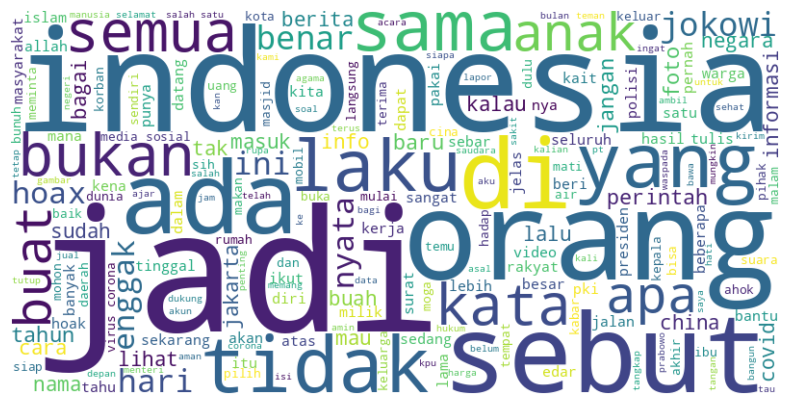

In [ ]:
text_data = ' '.join(lower)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

INTERPRETASI Visualisasi diatas berbentuk Word Cloud yang menyatakan bahwa kata-kata yang paling sering muncul dalam sebuah post/berita adalah Indonesia, jadi, orang, sebut, tidak laku, ada, yang, di.

![Word Cloud Hoax](https://raw.githubusercontent.com/jo-vina/Kelompok-4-Study-Case-Model-Klasifikasi/main/hoax.png)


INTERPRETASI visualisasi Word Cloud :

Dari Visualisasi Word Cloud data Hoax diatas, dapat diketahui bahwa kata - kata yang paling sering muncul atau mendominasi pada Post menggunakan kata-kata seperti sama, baru, semua, nyata, dan buat.
Jika menemukan kata-kata tersebut ketika dalam post/berita, dianjurkan untuk berhati-hati dan memastikan kebenaran data. Dari Word Cloud juga dapat diketahui bahwa post/berita yang berisi hoax banyak pada topik virus-corona, covid, corona, dan china.

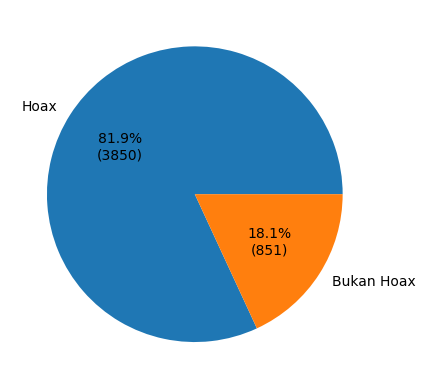

In [ ]:
# Visualize the distribution of labels
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.pie(data['label'].value_counts(),labels = ['Hoax', 'Bukan Hoax'], autopct=autopct_format(data['label'].value_counts()))
plt.show()

INTERPRETASI Distribusi Label :

Dari Visualisasi Distribusi Label diatas,jumlah post atau berita hoax sebesar 81.9%, sedangkan jumlah post atau berita bukan hoax sebesar 18.1%.

Karen jumlah post hoax lebih besar, maka perlu di perhatikan agar lebih berhati-hati dalam memahami dan mencerna informasi yang didapatkan serta dianjurkan untuk memastkan kembali data atau informasi yang didapat.

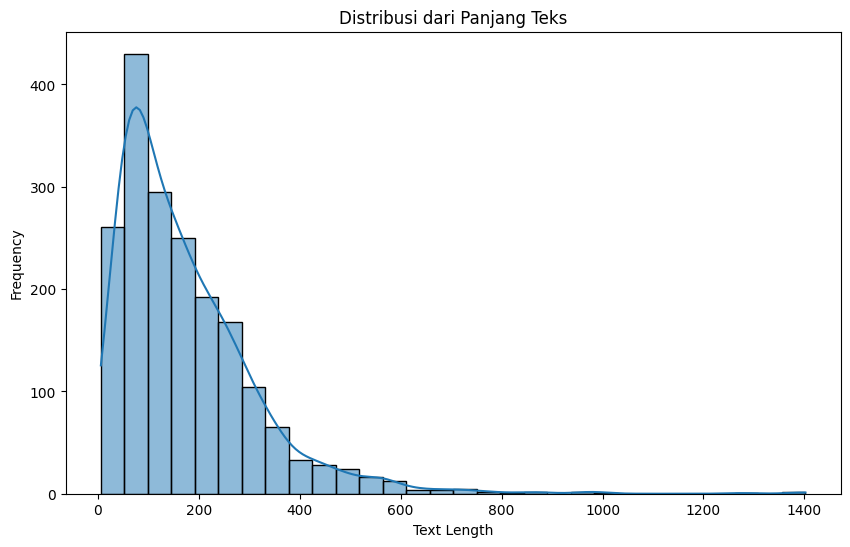

In [ ]:
# Visualize the distribution of text lengths
df['text_length'] = df['narasi'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribusi dari Panjang Teks')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

INTERPRETASI Visualize the distribution of the text lengths

Dari Visualisaasi Distribusi dari Panjang teks diatas didapatkan bahwa Panjang teks yang paling banyak muncul dalam post atau berita berada pada rentang 100 sampai 200 kata dengan frekuensi terbesar sekitar lebih dari 400.


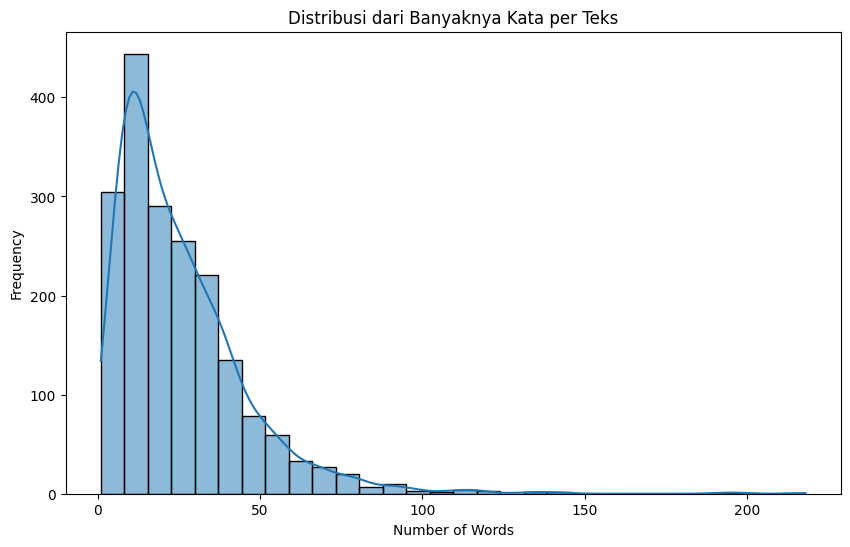

In [ ]:
# Visualize the distribution of the number of words per text
df['num_words'] = df['narasi'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['num_words'], bins=30, kde=True)
plt.title('Distribusi dari Banyaknya Kata per Teks')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

INTERPRETASI Visualize the distribution of the number of word per text

Dari Visualisaasi Distribusi banyaknya kata per teks diatas, banyaknya kata per teks berkisar antara 10 sampai 50 kata dengan frekuensi sebesar lebih dari 400.

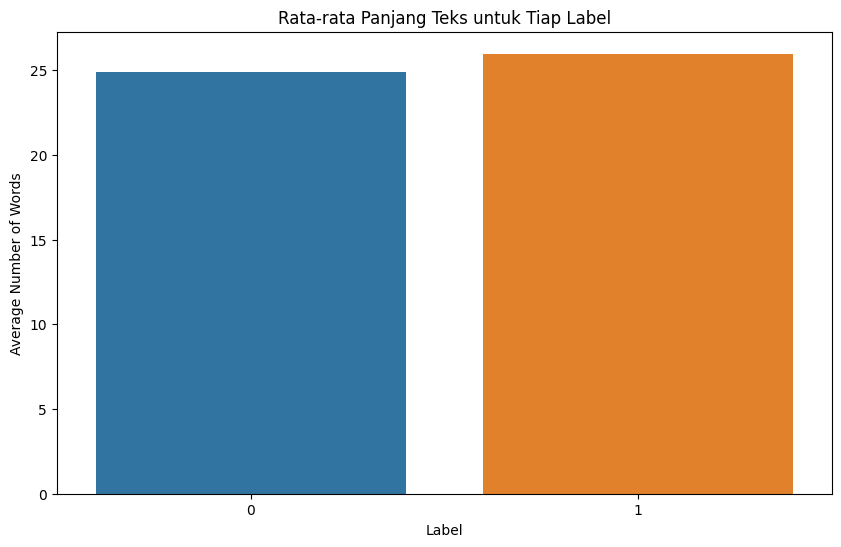

In [ ]:
# Grouped bar plot for average text lengths for each class
average_text_lengths = df.groupby('label')['num_words'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='num_words', data=average_text_lengths)
plt.title('Rata-rata Panjang Teks untuk Tiap Label')
plt.xlabel('Label')
plt.ylabel('Average Number of Words')
plt.show()

INTERPRETASI Rata-Rata Panjang Teks untuk Tiap Label

Dari plot diatas didapatkan bahwa label berita hoax memiliki rata-rata teks lebih besar dengan average number of words sebesar lebih dari 25. Dibandingkan label berita bukan hoax dengan number of words sekitar 25.


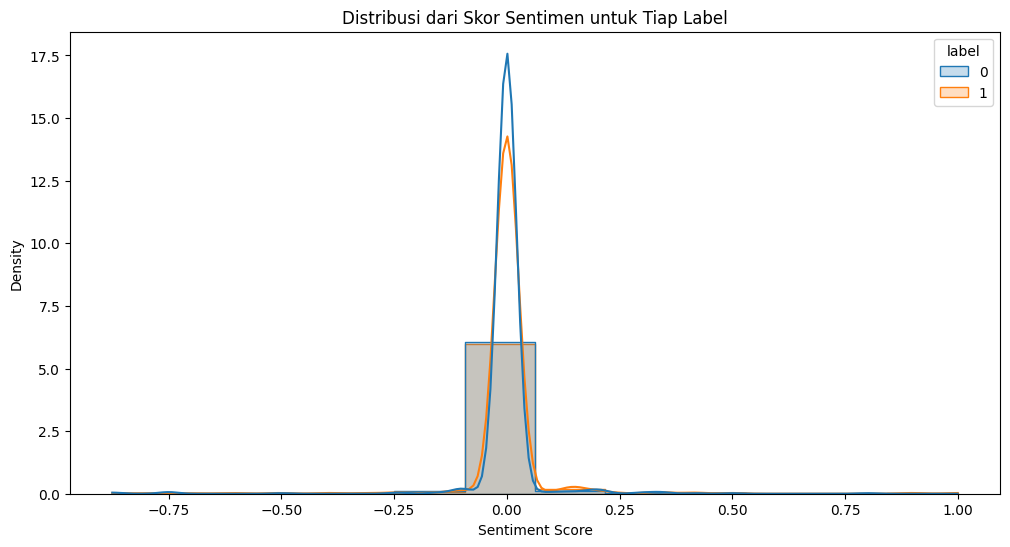

In [ ]:
# Visualize the distribution of sentiment scores
df['sentiment'] = df['narasi'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(12, 6))
sns.histplot(df, x='sentiment', hue='label', element="step", common_norm=False, stat="density", kde=True)
plt.title('Distribusi dari Skor Sentimen untuk Tiap Label')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

INTERPRETASI Visualize the distribution of setiment score

Dari plot diatas, diperoleh bahwa pada skor sentimen relatif 0, lebih banyak post/berita bukan hoax daripada post/berita hoax.

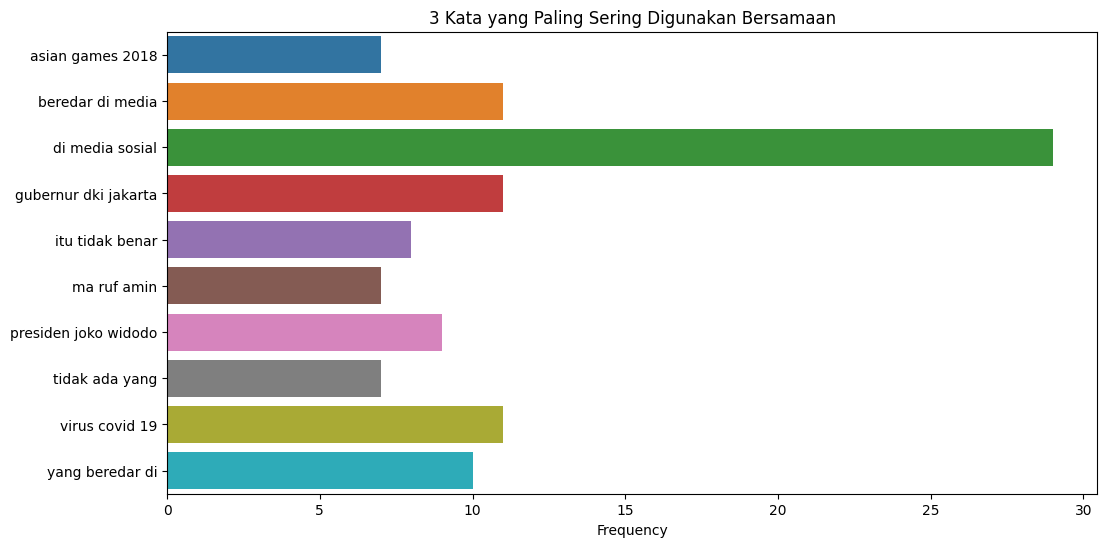

In [ ]:
# Visualize the most common trigrams
def plot_most_common_trigrams(text_data, title):
    vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=10)
    trigram_counts = vectorizer.fit_transform(text_data)
    trigrams = vectorizer.get_feature_names_out()

    total_trigram_counts = trigram_counts.sum(axis=0).tolist()[0]
    trigram_freq = dict(zip(trigrams, total_trigram_counts))

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(trigram_freq.values()), y=list(trigram_freq.keys()))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

plot_most_common_trigrams(df['narasi'], '3 Kata yang Paling Sering Digunakan Bersamaan')

INTERPRETASI the Visualize the most common trigrams

Visualisaasi diatas dari 3 kata yang paling sering digunakan bersamaan dalam narasi yang paling banyak muncul dalam post adalah “di media sosial” dengan frekuensi terbesar sekitar 28. Frekuensi yang sering muncul selanjutnya diduduki oleh kata “beredar di media” “gubernur dki jakarta” “virus covid 19” dengan frekuensi yang sama sebesar 11. Selanjutnya, kata “ma ruf amin” dan “tidak ada yang” memiliki frekuensi terkecil dibandingkan yang lain yaitu sebesar sekitar 6.5.


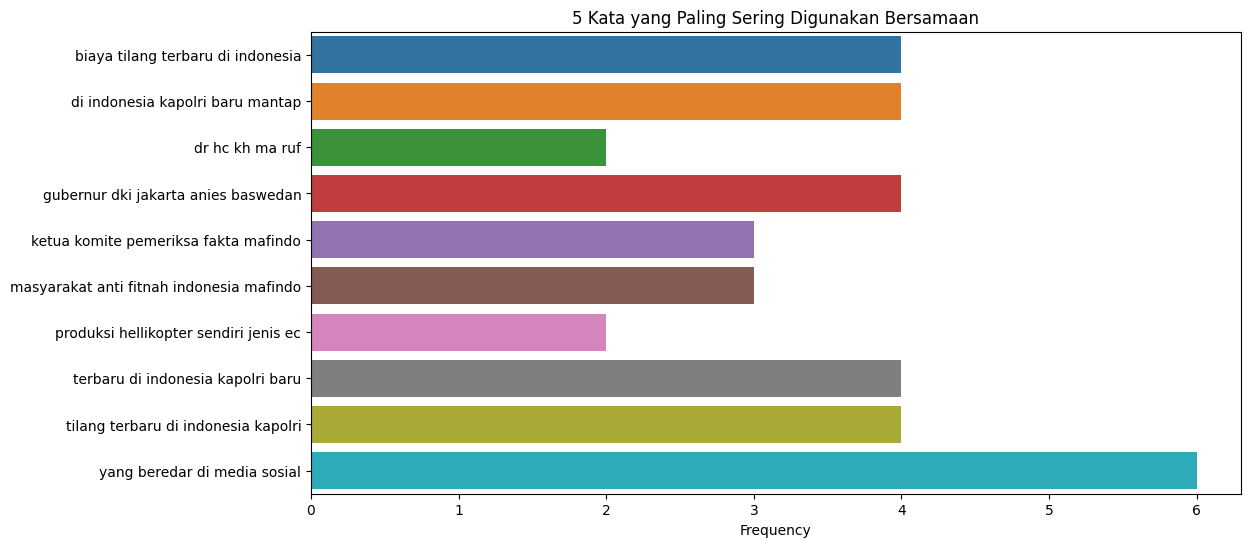

In [ ]:
# Visualize the most common pentagrams
def plot_most_common_trigrams(text_data, title):
    vectorizer = CountVectorizer(ngram_range=(5, 5), max_features=10)
    trigram_counts = vectorizer.fit_transform(text_data)
    trigrams = vectorizer.get_feature_names_out()

    total_trigram_counts = trigram_counts.sum(axis=0).tolist()[0]
    trigram_freq = dict(zip(trigrams, total_trigram_counts))

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(trigram_freq.values()), y=list(trigram_freq.keys()))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

plot_most_common_trigrams(df['narasi'], '5 Kata yang Paling Sering Digunakan Bersamaan')

Interpretasi Visualize the most common pentagrams

Dari visualisai di atas, dapat kita lihat 5 kata yang paling sering digunakan bersama adalah "yang beredar di sosial media" dengan frekuensi sebanyak 6 kali. Selanjutnya diikuti dengn "biaya tilang terbaru di indonesia", "di indonesia kapolri baru mantap", "gubernur dki jakarta anies baswedan", "terbaru di indonesia kapolri baru", dan "tilang terbaru di indonesia kapolri" dengan frekuensi sebanyak 4 kali. Dan dengan frekuensi paling sedikit, yaitu 2 adalah "dr hc kh ma ruf" dan "produksi hellikopter sendiri jenis ac".

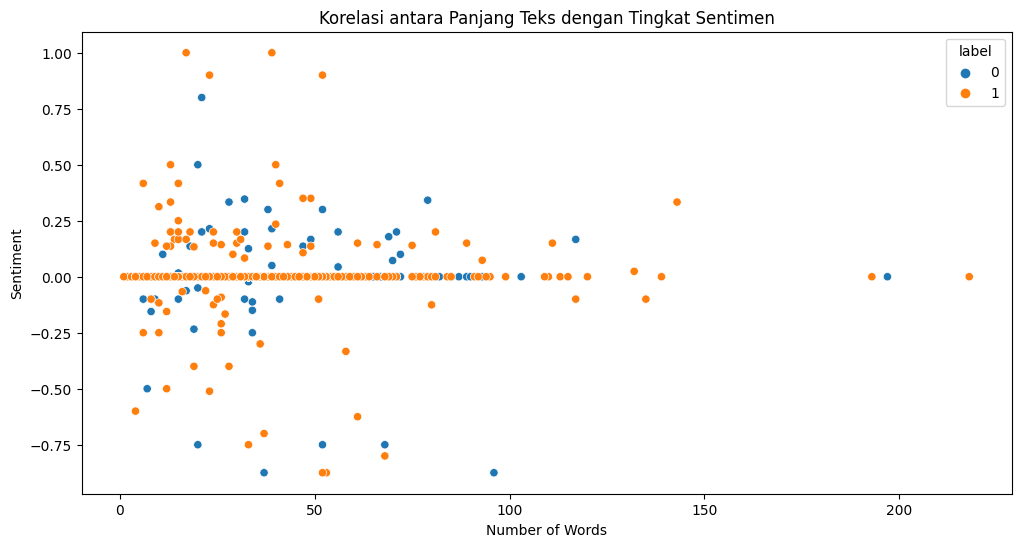

In [ ]:
# Explore the correlation between text length and sentiment
df['sentiment'] = df['narasi'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_words', y='sentiment', hue='label', data=df)
plt.title('Korelasi antara Panjang Teks dengan Tingkat Sentimen')
plt.xlabel('Number of Words')
plt.ylabel('Sentiment')
plt.show()

Interpretasi Explore the correlation between text length and sentiment

Dapat dilihat dari visualisasi scatter plot di atas, mayoritas titik berada di sekitar nilai sentimen 0, hal ini menunjukkan bahwa panjang teks tidak secara khusus berdampak pada sentimen dari data yang diamati.

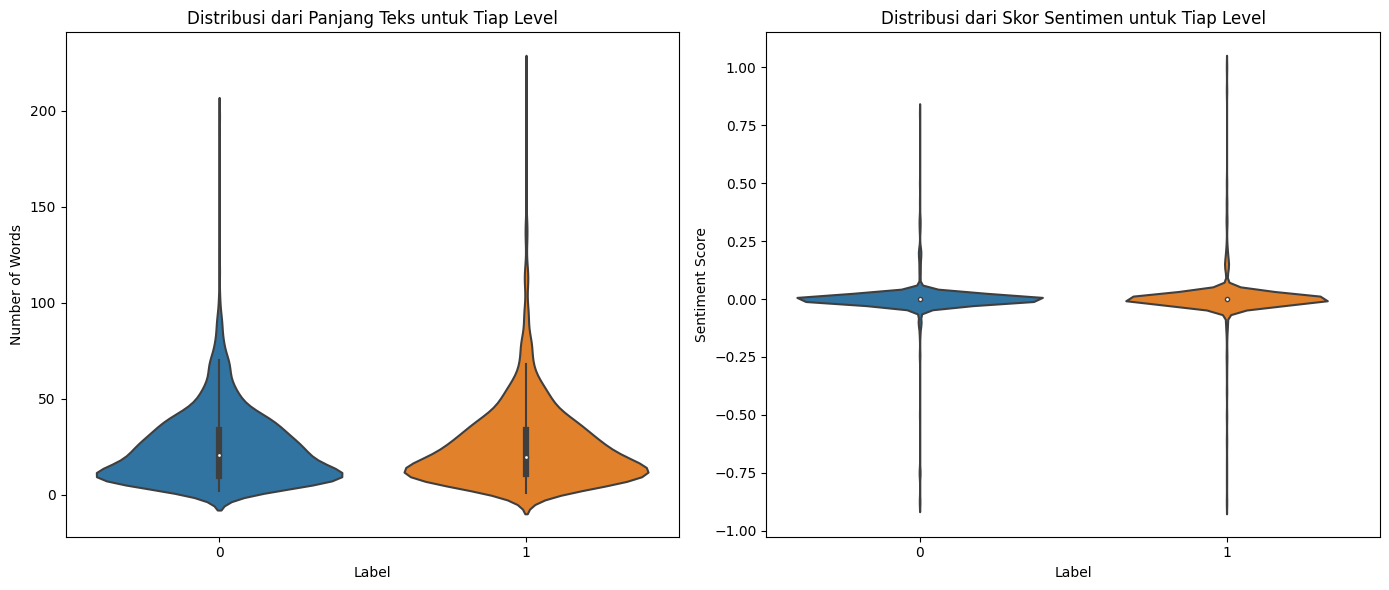

In [ ]:
# Violin plot for the distribution of text lengths and sentiment scores
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='label', y='num_words', data=df)
plt.title('Distribusi dari Panjang Teks untuk Tiap Level')
plt.xlabel('Label')
plt.ylabel('Number of Words')

plt.subplot(1, 2, 2)
sns.violinplot(x='label', y='sentiment', data=df)
plt.title('Distribusi dari Skor Sentimen untuk Tiap Level')
plt.xlabel('Label')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

Interpretasi Violin plot for the distribution of text lengths and sentiment scores

Dari hasil violin plot di atas, dapat dilihat bahwa body pada **Label 0** lebih besar dibandingkan **Label 1**, hal ini menunjukkan bahwa **Label 0** memiliki teks-teks yang mencakup rentang lebih luas dari skor sentimen dibandingkan dengan **Label 1**. Selain itu, dapat dilihat juga bahwa puncak violin berada di nilai positif, hal ini menandakan bahwa mayoritas teks memiliki skor sentimen positif.

##Model Klasifikasi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tokens, label, test_size=0.3, stratify=label)

In [ ]:
print('X_train : ', len(X_train))
print('X_test : ', len(X_test))

X_train :  1331
X_test :  571


In [ ]:
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

y_train

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
Tfidf_vect.fit(["".join(row) for row in X_train])

TfidfVectorizer()

In [ ]:
X_train_Tfidf = Tfidf_vect.transform([" ".join(row) for row in X_train])
X_test_Tfidf = Tfidf_vect.transform([" ".join(row) for row in X_test])

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=1, gamma="auto", verbose=True)
SVM.fit(X_train_Tfidf, y_train)  # predict the labels on validation dataset

# Menggunakan metrics accuracy untuk melihat performa model
predictions_SVM = SVM.predict(X_test_Tfidf)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)

[LibSVM]SVM Accuracy Score ->  54.46584938704028


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_Tfidf, y_train)

prediction_rf = rf.predict(X_test_Tfidf)
print("RandomForest Accuracy Score -> ", accuracy_score(prediction_rf, y_test)*100)

RandomForest Accuracy Score ->  54.290718038528894


In [ ]:
clf = MultinomialNB()
clf.fit(X_train_Tfidf, y_train)

prediction_clf = clf.predict(X_test_Tfidf)
print("Multinomial Naive Bayes Accuracy Score -> ", accuracy_score(prediction_clf, y_test)*100)

Multinomial Naive Bayes Accuracy Score ->  54.64098073555166


In [ ]:
kNN = KNeighborsClassifier(3)
kNN.fit(X_train_Tfidf, y_train)

prediction_kNN = kNN.predict(X_test_Tfidf)
print("kNN Accuracy Score -> ", accuracy_score(prediction_kNN, y_test)*100)

kNN Accuracy Score ->  50.26269702276708


In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_Tfidf, y_train)

prediction_dt = dt.predict(X_test_Tfidf)
print("Decision Tree Accuracy Score -> ", accuracy_score(prediction_dt, y_test)*100)

Decision Tree Accuracy Score ->  54.81611208406305


Diperoleh bahwa akurasi untuk model SVM adalah 54.64, untuk Random Forest adalah 54.991, untuk Multinomial Naive Bayes adalah 54.991, untuk kNNeighbors adalah 49.737, dan untuk Decision Tree adalah 54.991. Model yang dapat digunakan adalah model dengan nilai akurasi tertinggi, yaitu Random Forest, Multinomial Naive Bayes dan Decision Tree. Walaupun begitu, nilai 54.991 merupakan skor yang tidak baik untuk akurasi model.